In [4]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.datasets import make_circles

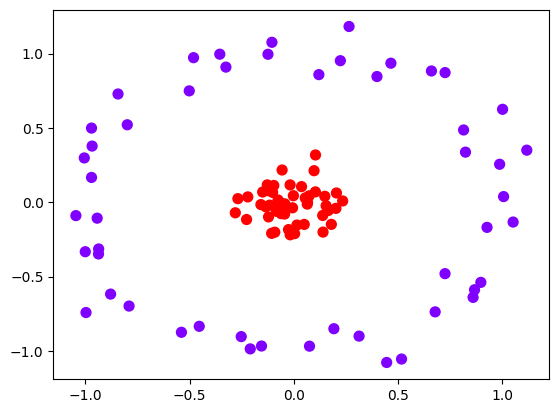

In [6]:
X,y = make_circles(100,factor = 0.1,noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')

In [10]:
#画图函数
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X,Y,P,
          colors = 'k',
          levels=[-1,0,1],
          alpha = 0.5,
          linestyles = ['--','-','--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

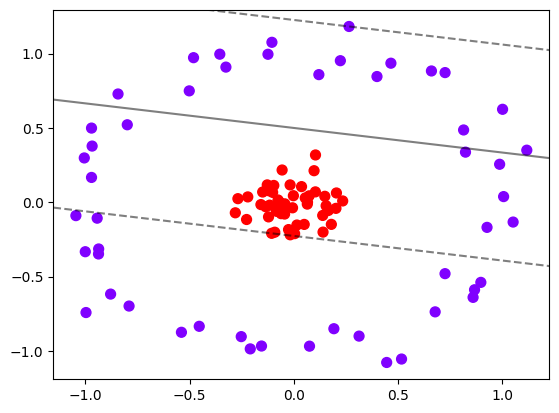

In [13]:
clf =  SVC(kernel = 'linear').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'rainbow')
plot_svc_decision_function(clf)

In [15]:
clf.score(X,y)#不适合非线性数据

0.67

In [25]:
#定义一个由x计算出来的新维度r
r = np.exp(-(X**2).sum(1))
r
rlim = np.linspace(min(r),max(r),100)


array([0.21322084, 0.22115353, 0.22908623, 0.23701892, 0.24495162,
       0.25288432, 0.26081701, 0.26874971, 0.27668241, 0.2846151 ,
       0.2925478 , 0.30048049, 0.30841319, 0.31634589, 0.32427858,
       0.33221128, 0.34014397, 0.34807667, 0.35600937, 0.36394206,
       0.37187476, 0.37980745, 0.38774015, 0.39567285, 0.40360554,
       0.41153824, 0.41947094, 0.42740363, 0.43533633, 0.44326902,
       0.45120172, 0.45913442, 0.46706711, 0.47499981, 0.4829325 ,
       0.4908652 , 0.4987979 , 0.50673059, 0.51466329, 0.52259598,
       0.53052868, 0.53846138, 0.54639407, 0.55432677, 0.56225947,
       0.57019216, 0.57812486, 0.58605755, 0.59399025, 0.60192295,
       0.60985564, 0.61778834, 0.62572103, 0.63365373, 0.64158643,
       0.64951912, 0.65745182, 0.66538451, 0.67331721, 0.68124991,
       0.6891826 , 0.6971153 , 0.70504799, 0.71298069, 0.72091339,
       0.72884608, 0.73677878, 0.74471148, 0.75264417, 0.76057687,
       0.76850956, 0.77644226, 0.78437496, 0.79230765, 0.80024

In [29]:
from mpl_toolkits import mplot3d

In [31]:
def plot_3D(elev = 30,azim = 30,X=X,y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c=y,s=50,cmap='rainbow')
    ax.view_init(elev = elev,azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    plt.show()

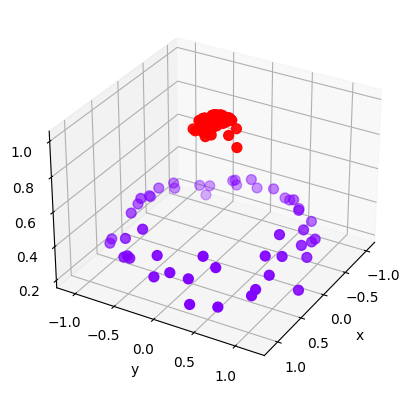

In [32]:
plot_3D()

In [36]:
from ipywidgets import interact,fixed
interact(plot_3D,elev=[0,30,60,90,120],azip=(-180,180),X=fixed(X),y=fixed(y))
plt.show()

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90, 120), value=30), IntSlider…

# 核变换 核函数  Kernel Function
### kernel = 'linear', 'poly','sigmoid','rbf'
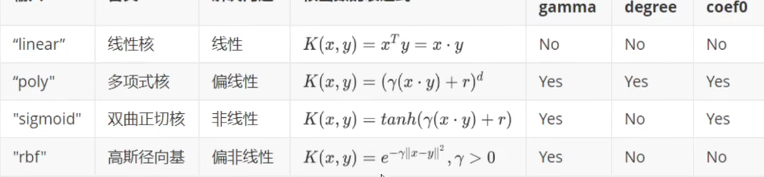
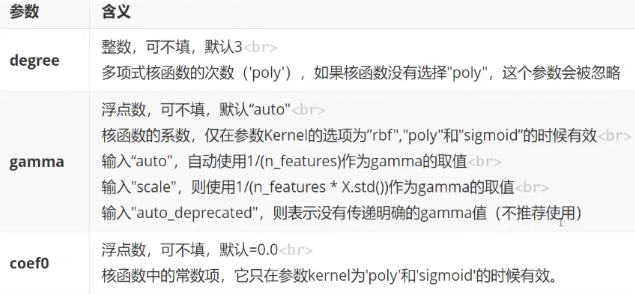

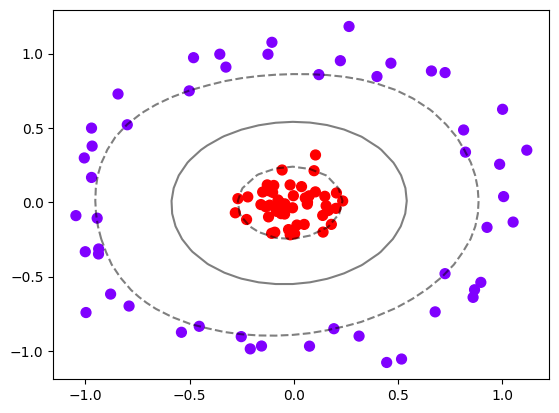

In [43]:
clf =  SVC(kernel = 'rbf').fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'rainbow')
plot_svc_decision_function(clf)


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.datasets import (make_circles,
                              make_moons,
                             make_blobs,
                             make_classification)

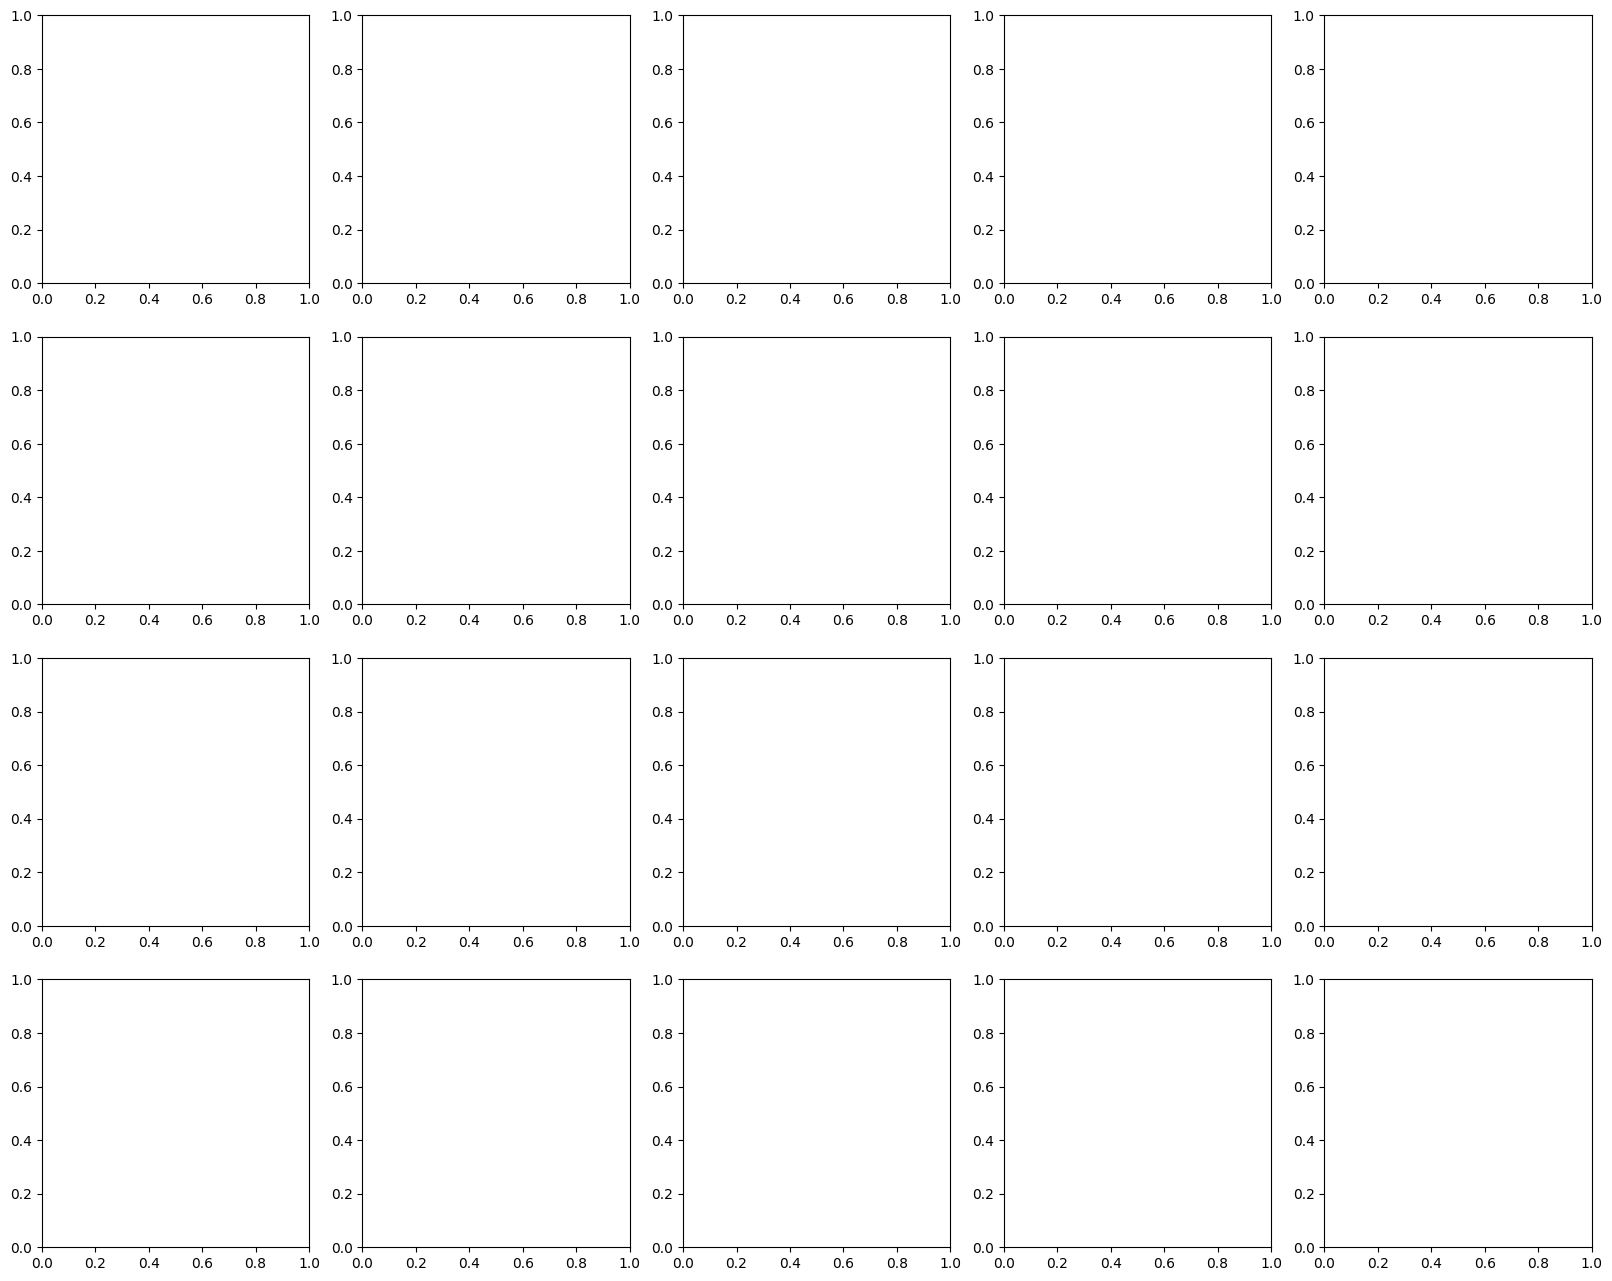

In [79]:
#数据与子图
n_samples = 100

datasets =[
    make_moons(n_samples=n_samples,noise=0.2,random_state=0),
    make_circles(n_samples=n_samples,noise=0.2,factor=0.5,random_state=1),
    make_blobs(n_samples=n_samples,centers=2,random_state=5),
    make_classification(n_samples=n_samples,n_features=2,
                       n_informative=2,n_redundant=0,random_state=5)
]

Kernel = ['linear','poly','rbf','sigmoid']

# for X,Y in datasets:
#     plt.figure(figsize=(5,4))
#     plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap = 'rainbow')
    
nrows = len(datasets)
ncols = len(Kernel)+1

fig,axes = plt.subplots(nrows,ncols,figsize=(20,16))


In [80]:
for ds_cnt,(X,Y) in enumerate(datasets):
    
    ax = axes[ds_cnt,0]
    if ds_cnt ==0:
        ax.set_title('input data')
    ax.scatter(X[:,0],X[:,1],c=Y,zorder=10,cmap=plt.cm.Paired,edgecolors='k')
    ax.set_xticks(())
    ax.set_yticks(())
    
    for est_idx,kernel in enumerate(Kernel):
        
        #子图位置
        ax = axes[ds_cnt,est_idx +1]
        
        #建模
        clf = svm.SVC(kernel = kernel, gamma=2).fit(X,Y)
        score = clf.score(X,Y)
        
        ax.scatter(X[:,0],X[:,1],c=Y,
                  zorder = 10,
                  cmap=plt.cm.Paired,edgecolor = 'k')
        
        #绘制支持向量
        ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=50,
                  facecolors='none',zorder=10,edgecolors='k')
        
        #决策边界
        x_min,x_max = X[:,0].min() - .5,X[:,0].max() + .5
        y_min,y_max = X[:,1].min() - .5,X[:,1].max() + .5
        
        XX,YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #等高线加入颜色
        ax.pcolormesh(XX,YY,Z >0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX,YY,Z,
                  colors = ['k','k','k'],
                  linestyles = ['--','-','--'],
                  levels = [-1,0,1])
        
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt == 0:
            ax.set_title(kernel)
        
        ax.text(0.95,0.06,('%.2f' % score).lstrip('0'),
               size = 15,
               bbox = dict(boxstyle='round',alpha=0.8,facecolor='white'),
               transform = ax.transAxes,
               horizontalalignment = 'right'
               )
plt.tight_layout()
plt.show()


C:\Users\fakenews\AppData\Local\Temp\ipykernel_43296\2633094703.py:37: UserWarning: No contour levels were found within the data range.
  ax.contour(XX,YY,Z,


<Figure size 640x480 with 0 Axes>

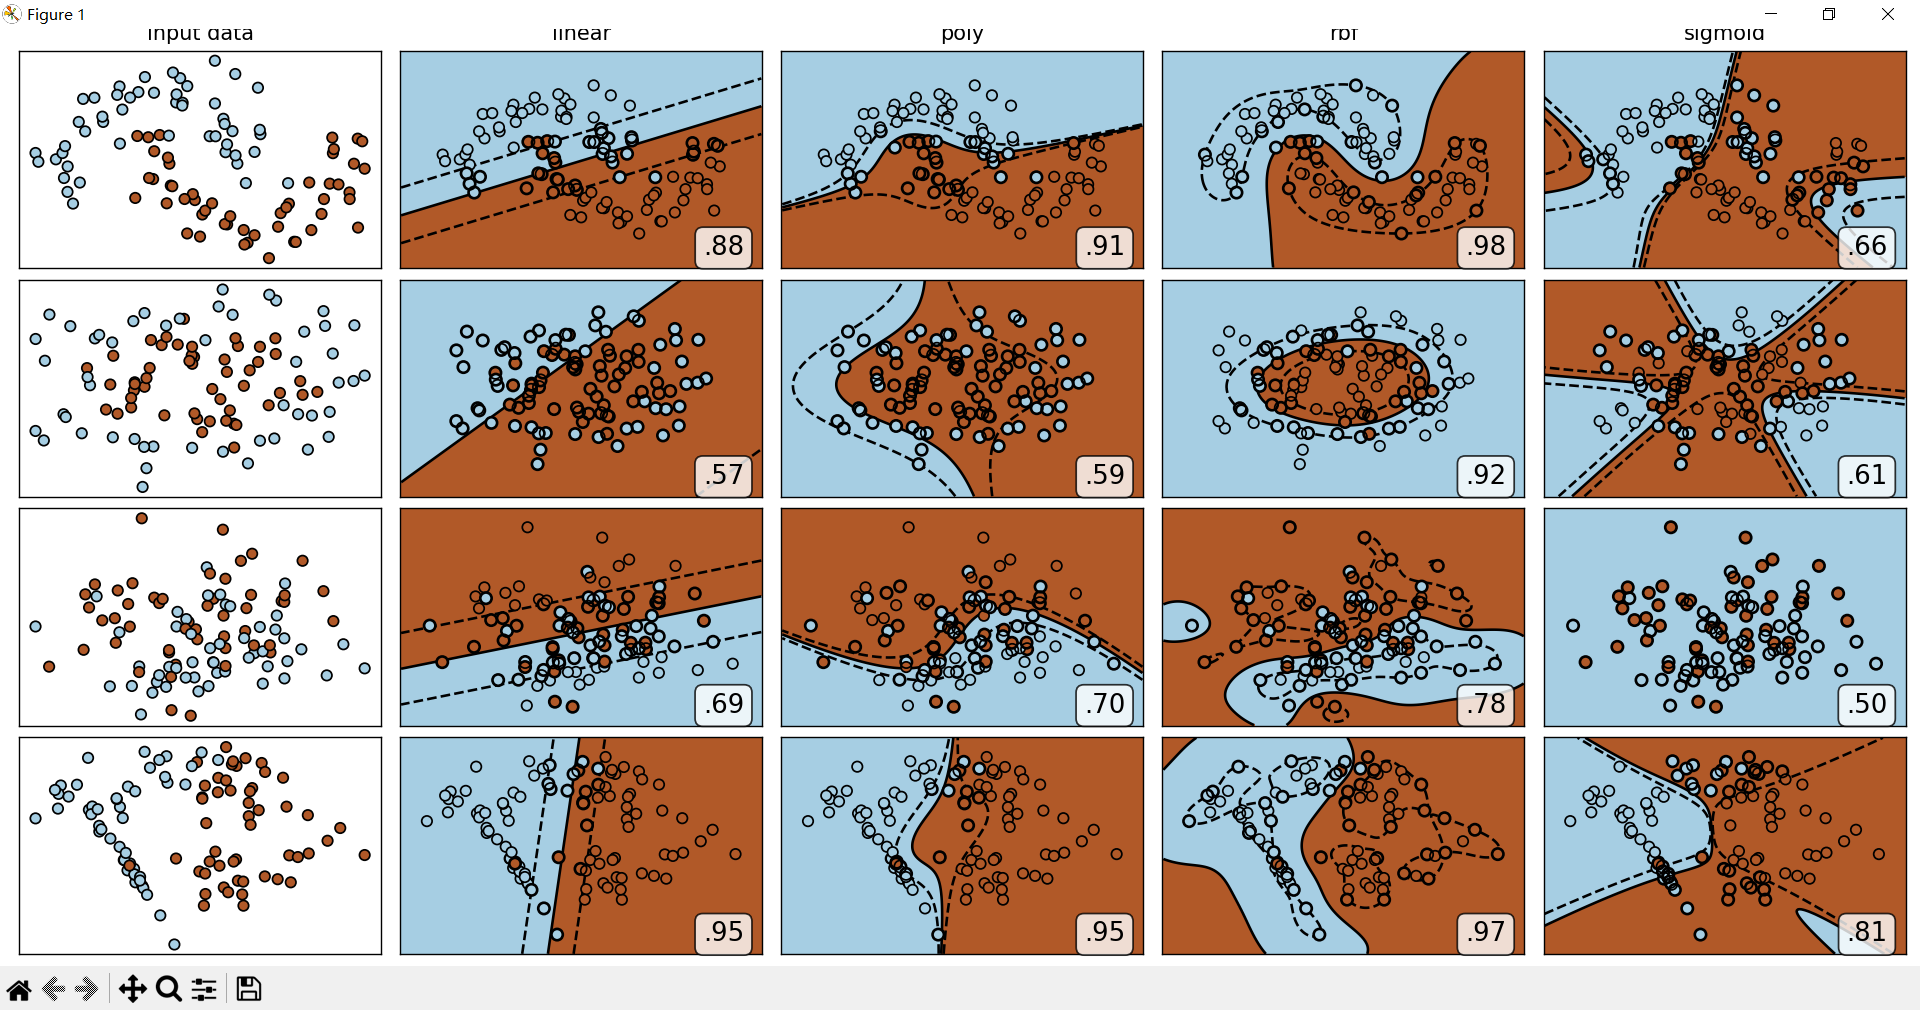